In [1]:
import tkinter as tk
import colorsys
import math

class RectangularGrid:
    def __init__(self, master):
        self.master = master
        master.title("Rectangular Grid Painter")

        # Параметры по умолчанию
        self.width = 600
        self.height = 600
        self.grid_x = 5
        self.grid_y = 5
        self.coloring_mode = "spiral"

        # Элементы управления
        tk.Label(master, text="Width:").grid(row=0, column=0, sticky="e")
        self.width_entry = tk.Entry(master)
        self.width_entry.insert(0, str(self.width))
        self.width_entry.grid(row=0, column=1, sticky="w")

        tk.Label(master, text="Height:").grid(row=1, column=0, sticky="e")
        self.height_entry = tk.Entry(master)
        self.height_entry.insert(0, str(self.height))
        self.height_entry.grid(row=1, column=1, sticky="w")


        tk.Label(master, text="Grid X:").grid(row=2, column=0, sticky="e")
        self.grid_x_entry = tk.Entry(master)
        self.grid_x_entry.insert(0, str(self.grid_x))
        self.grid_x_entry.grid(row=2, column=1, sticky="w")

        tk.Label(master, text="Grid Y:").grid(row=3, column=0, sticky="e")
        self.grid_y_entry = tk.Entry(master)
        self.grid_y_entry.insert(0, str(self.grid_y))
        self.grid_y_entry.grid(row=3, column=1, sticky="w")
    
        tk.Label(master, text="Coloring Mode:").grid(row=4, column=0, sticky="e")
        self.coloring_mode_var = tk.StringVar(value=self.coloring_mode)
        tk.Radiobutton(master, text="Spiral", variable=self.coloring_mode_var, value="spiral").grid(row=4, column=1, sticky="w")
        tk.Radiobutton(master, text="Snake", variable=self.coloring_mode_var, value="snake").grid(row=5, column=1, sticky="w")


        tk.Button(master, text="Draw Grid", command=self.draw_grid).grid(row=6, column=0, columnspan=2, pady=10)

        self.canvas = tk.Canvas(master, width=self.width, height=self.height, bg="white")
        self.canvas.grid(row=7, column=0, columnspan=2)

    def draw_grid(self):
      try:
        self.width = int(self.width_entry.get())
        self.height = int(self.height_entry.get())
        self.grid_x = int(self.grid_x_entry.get())
        self.grid_y = int(self.grid_y_entry.get())
        self.coloring_mode = self.coloring_mode_var.get()
      except ValueError:
        print ("Введите целые числа")
        return

      
      self.canvas.config(width=self.width, height=self.height)
      self.canvas.delete("all")

      rect_width = self.width / self.grid_x
      rect_height = self.height / self.grid_y

      total_rectangles = self.grid_x * self.grid_y
      colors = self.generate_rainbow_colors(total_rectangles)
      
      if self.coloring_mode == "spiral":
        rectangles = self.generate_spiral_rectangle_order()
        for i, (x,y) in enumerate(rectangles):
           self.draw_rectangle(x*rect_width, y*rect_height,rect_width,rect_height, colors[i] )

      elif self.coloring_mode == "snake":
        for i in range(self.grid_y):
          if i % 2 == 0 :
            for j in range(self.grid_x):
               color_index = i * self.grid_x + j
               self.draw_rectangle(j * rect_width, i*rect_height, rect_width, rect_height, colors[color_index])

          else:
              for j in range(self.grid_x):
                 color_index = i * self.grid_x + (self.grid_x - j-1)
                 self.draw_rectangle(j * rect_width, i*rect_height, rect_width, rect_height, colors[color_index])

    def draw_rectangle(self, x, y, width, height, color):
      self.canvas.create_rectangle(x, y, x + width, y + height, fill=color, outline="") #outline чтобы не было черных границ

    def generate_rainbow_colors(self, num_colors):
        colors = []
        for i in range(num_colors):
            hue = i / num_colors
            r, g, b = colorsys.hsv_to_rgb(hue, 1, 1)
            hex_color = '#%02x%02x%02x' % (int(r * 255), int(g * 255), int(b * 255))
            colors.append(hex_color)
        return colors

    def generate_spiral_rectangle_order(self):
        x_center = self.grid_x // 2
        y_center = self.grid_y // 2

        x, y = x_center, y_center
        dx, dy = 0, -1  # Начинаем движение вверх
        
        rectangles = []
        visited = set()

        for i in range(self.grid_x * self.grid_y):
            rectangles.append((x,y))
            visited.add((x, y))
            # Проверяем, нужно ли менять направление
            if (x + dx < 0 or x + dx >= self.grid_x or y + dy < 0 or y + dy >= self.grid_y or (x + dx,y+dy) in visited):
              dx, dy = -dy, dx  # Поворот на 90 градусов
            x += dx
            y += dy
        
        return rectangles

root = tk.Tk()
app = RectangularGrid(root)
root.mainloop()

C:\Users\bulyn\AppData\Local\Temp\ipykernel_17132\4222593897.py:26: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  rect = plt.Rectangle((j, -i), 1, 1, color=colors[grid[i, j] - 1], edgecolor="black")


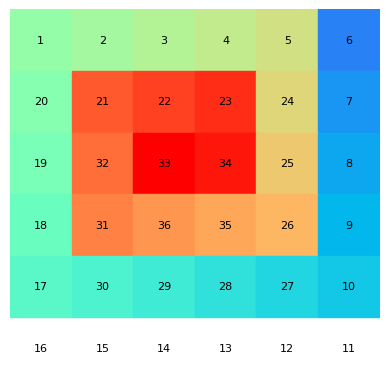

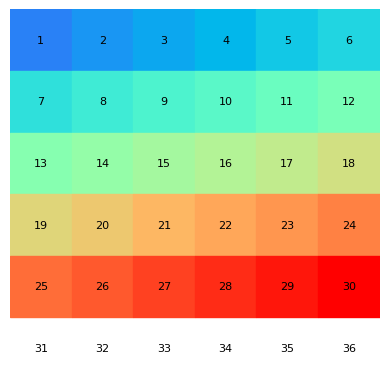

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def draw_numbered_grid(m, n, method='spiral'):
    fig, ax = plt.subplots()
    colors = plt.cm.rainbow(np.linspace(0, 1, m * n))  # Генерация палитры rainbow
    grid = np.zeros((m, n), dtype=int)
    
    # Заполнение индексов для окрашивания
    if method == 'spiral':
        i, j, di, dj = 0, 0, 0, 1
        for k in range(1, m * n + 1):
            grid[i, j] = k
            if grid[(i + di) % m, (j + dj) % n] != 0:
                di, dj = dj, -di
            i += di
            j += dj
    else:  # Метод змейкой
        for i in range(m):
            for j in (range(n) if i % 2 == 0 else range(n-1, -1, -1)):
                grid[i, j] = i * n + j + 1
    
    # Рисование блоков и добавление чисел
    for i in range(m):
        for j in range(n):
            rect = plt.Rectangle((j, -i), 1, 1, color=colors[grid[i, j] - 1], edgecolor="black")
            ax.add_patch(rect)
            plt.text(j + 0.5, -i - 0.5, str(grid[i, j]), 
                     color="black", ha='center', va='center', fontsize=8)
    
    ax.set_xlim(0, n)
    ax.set_ylim(-m, 0)
    ax.set_aspect('equal')
    plt.axis('off')
    plt.show()

# Вызов функции: m - количество строк, n - количество столбцов
draw_numbered_grid(6, 6, method='spiral')  # Метод "спираль"
draw_numbered_grid(6, 6, method='snake')   # Метод "змейкой"
